## some goodies

In [30]:
import os

In [2]:
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

## Where is data

In [3]:
ipts="/SNS/ARCS/IPTS-12872/"

In [5]:
# data in consideration:
# 58784 through 58849

## Working dir

In [10]:
workdir = "/SNS/users/lj7/reduction/ARCS/ipts-12872"
!mkdir {workdir}

In [39]:
%cd {workdir}

/SNS/users/lj7/reduction/ARCS/ipts-12872


## Try one dataset first

In [9]:
# reduce to iqe
!mcvine instruments arcs nxs reduce --out iqe.nxs \
    --eaxis -100 70 1. --qaxis 0 15 0.1 --no-tof2E \
    --ibnorm ByCurrent \
    /SNS/ARCS/IPTS-12872/shared/autoreduce/ARCS_58784_autoreduced.nxs

/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/miniconda2/envs/mcvine.
  warnings.warn(msg)
* tof2E=False
/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:14: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *
FrameworkManager-[Notice] Welcome to Mantid 3.7.20160822.1320
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid
DownloadInstrument-[Notice] All

In [19]:
!mcvine mantid extract_iqe iqe.nxs iqe.h5

/home/lj7/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /home/lj7/miniconda2/envs/mcvine.
  warnings.warn(msg)


In [21]:
iqe = hh.load('iqe.h5')

plot z in (0, 0.00524857911965)


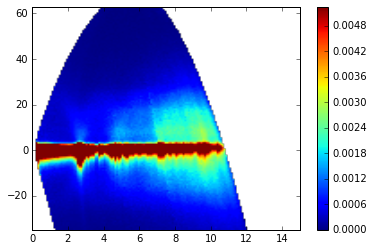

In [23]:
H.plot(iqe, min=0)

In [25]:
diffiq = iqe[(), (-6,4)].sum('energy')

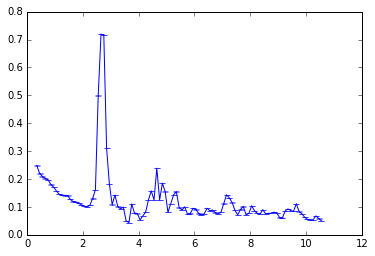

In [26]:
H.plot(diffiq)

## Batch reduction

In [53]:
runs = range(58784, 58849+1)

In [43]:
# runs = range(58810, 58849+1)

In [47]:
failed = []
for run in runs:
    cmd = """mcvine instruments arcs nxs reduce --out iqe_%(run)s.nxs \
    --eaxis -100 60 1. --qaxis 0 12 0.1 --no-tof2E \
    --ibnorm ByCurrent \
    /SNS/ARCS/IPTS-12872/shared/autoreduce/ARCS_%(run)s_autoreduced.nxs""" % locals()
    # print cmd
    print run
    if os.system(cmd): failed.append(cmd)
    continue

In [48]:
# convert to histogram h5 files
failed = []
for run in runs:
    cmd = """mcvine mantid extract_iqe iqe_%(run)s.nxs iqe_%(run)s.h5""" % locals()
    # print cmd
    print run
    if os.system(cmd): failed.append(cmd)
    continue

In [46]:
print failed

[]


## Extract diffraction pattern

In [54]:
# convert to histogram h5 files
for run in runs:
    # print cmd
    # print run
    print '.',
    iqe = hh.load("iqe_%s.h5" % run)
    diffiq = iqe[(), (-6,4)].sum('energy')
    hh.dump(diffiq, "diffiq_%s.nxs" % run)
    X = np.array([diffiq.Q, diffiq.I, diffiq.E2**.5]).T
    np.savetxt("diffiq_%s.dat" % run, X, fmt='%.8e', delimiter='\t')
    continue

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
